<a href="https://colab.research.google.com/github/Miglio7py/Value-at-Risk/blob/main/VaR_Sliding_Window.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calcolo VaR con Sliding Windows su dati storici**

In [40]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
adj_close_df = pd.DataFrame()
EM35 = pd.read_csv('/content/Dati/Storico EM35.csv')
EM710 = pd.read_csv('/content/Dati/Storico EM710.csv')
LCWD = pd.read_csv('/content/Dati/Storico LCWD.csv')
XMAW = pd.read_csv('/content/Dati/Storico XMAW.csv')

adj_close_df['EM35'] = EM35['Ultimo']
adj_close_df['EM710'] = EM710['Ultimo']
adj_close_df['LCWD'] = LCWD['Ultimo']
adj_close_df['XMAW'] = XMAW['Ultimo']

adj_close_df = adj_close_df.iloc[::-1].reset_index(drop=True)

In [75]:
adj_close_df["EM35"] = adj_close_df["EM35"].astype(str).str.replace(",", ".").astype(float).astype(float)
adj_close_df["EM710"] = adj_close_df["EM710"].astype(str).str.replace(",", ".").astype(float).astype(float)
adj_close_df["LCWD"] = adj_close_df["LCWD"].astype(str).str.replace(",", ".").astype(float).astype(float)
adj_close_df["XMAW"] = adj_close_df["XMAW"].astype(str).str.replace(",", ".").astype(float).astype(float)

In [77]:
r_log_df = np.log(adj_close_df / adj_close_df.shift(1))
r_log_df = r_log_df.dropna()

In [78]:
weights = np.array([0.0936, 0.209, 0.0778, 0.618])

Portfolio = pd.DataFrame()
n = 0
for i in r_log_df.columns:
  r_log_df[i] = r_log_df[i] * weights[n]
  n += 1

Portfolio = r_log_df.sum(axis=1)

In [107]:
days = 24

range = Portfolio.rolling(window=days).sum()

range = range.dropna()

Nel 0.5% dei casi in 24 giorni sono stati persi meno di: -1024.0712188421298 su un portafoglio di 4470€
la cifra persa equivale al -22.90987066760917% del portafoglio.


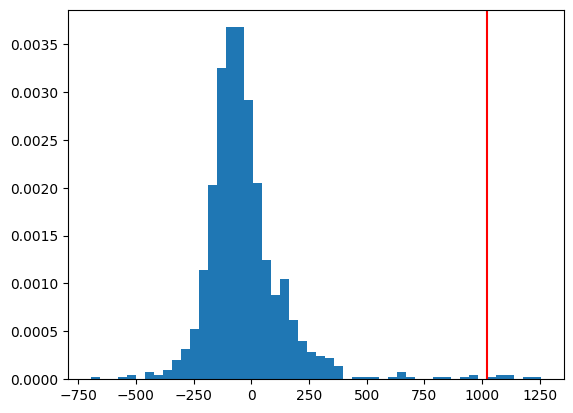

In [111]:
confidence_interval = 0.95
portfolio_value = 4470

gainloss = portfolio_value - (portfolio_value * (1+range))
VaR = np.percentile(gainloss, 100 * (1 - confidence_interval))
print(f"Nel {confidence_interval*100}% dei casi in {days} giorni sono stati persi meno di: {-VaR} su un portafoglio di {portfolio_value}€")
print(f"la cifra persa equivale al {((-VaR)/portfolio_value)*100}% del portafoglio.")

plt.hist(gainloss, bins=50, density=True)
plt.axvline(x=VaR, color='r')
plt.show()